In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd

# Option 1: If moved to home directory
data = pd.read_csv('/Users/chitrakshsingh/Downloads/Instagram_data_2.csv', encoding='latin1')

# Option 2: If moved to data directory
# data = pd.read_csv('/Users/chitrakshsingh/data/Instagram_data_2.csv', encoding='latin1')

print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [3]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


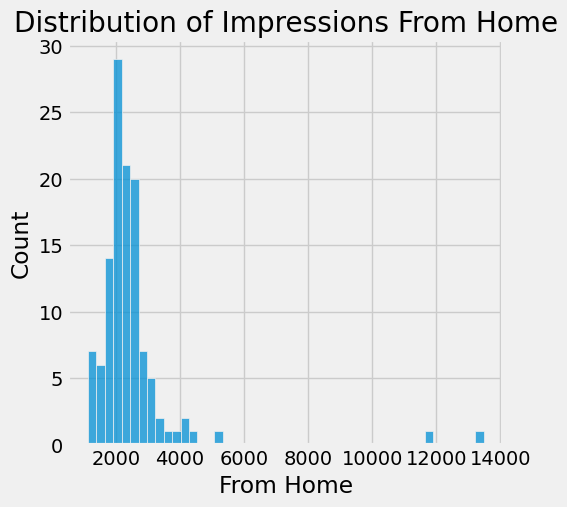

In [8]:
plt.figure(figsize=(5,5))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.histplot(data['From Home'])
plt.show()

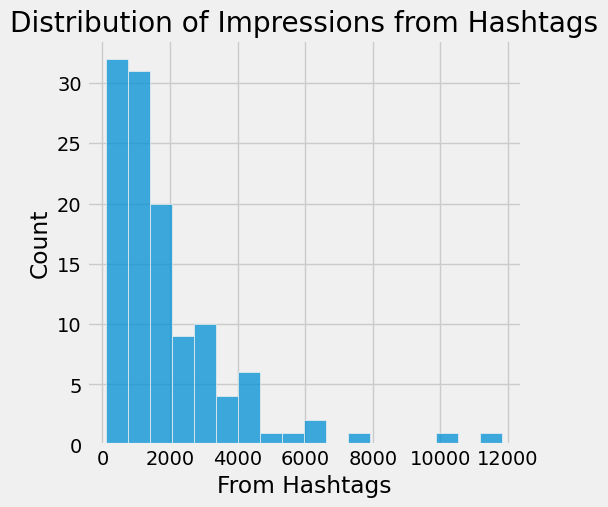

In [9]:
plt.figure(figsize=(5,5))
plt.title("Distribution of Impressions from Hashtags")
sns.histplot(data['From Hashtags'])
plt.show()

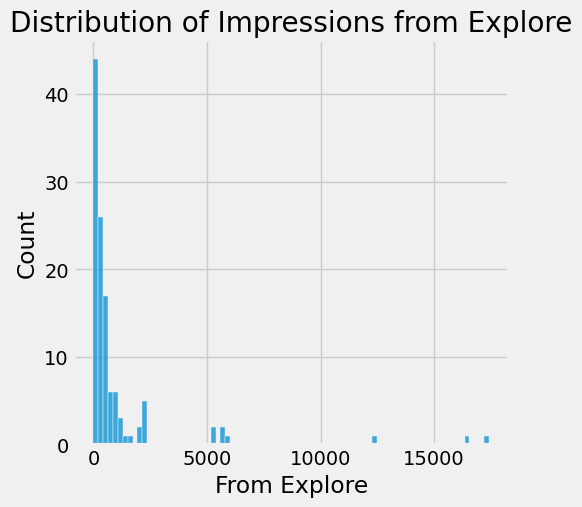

In [10]:
plt.figure(figsize=(5,5))
plt.title("Distribution of Impressions from Explore")
sns.histplot(data['From Explore'])
plt.show()

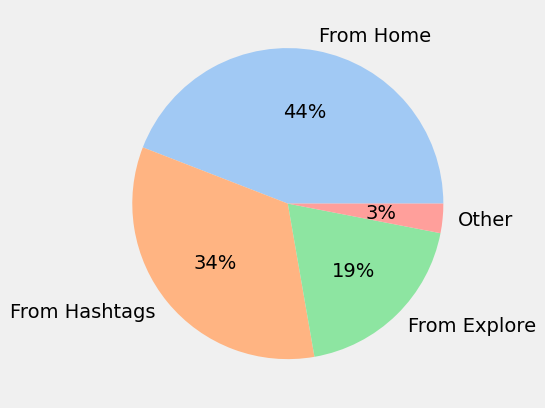

In [11]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]
palette_color = sns.color_palette('pastel')

plt.pie(values, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.show()

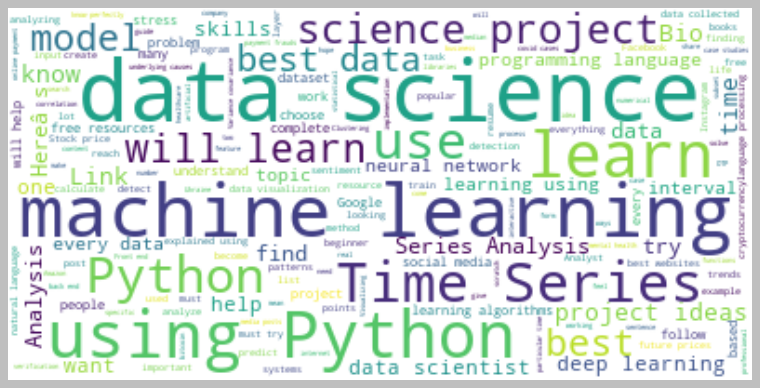

In [12]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

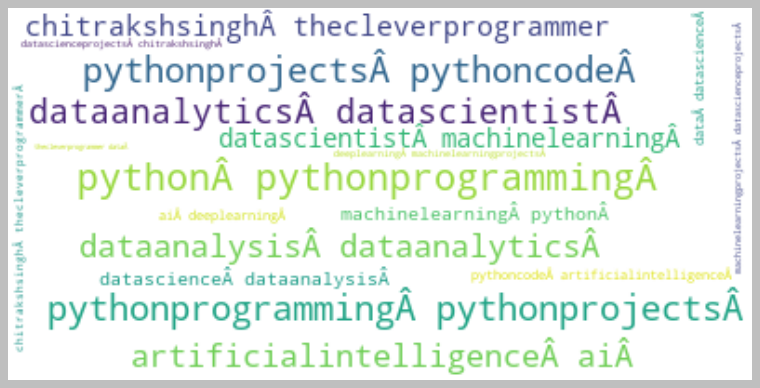

In [13]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

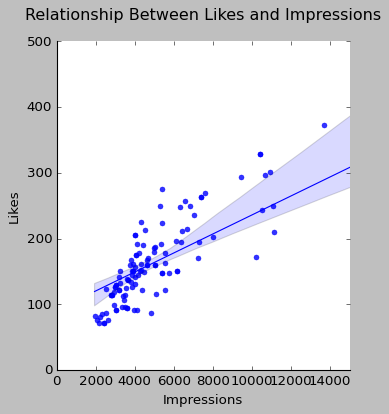

In [14]:
sns.lmplot(data=data, x="Impressions", y="Likes", fit_reg=True, scatter_kws={"s": 20}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Likes and Impressions", pad=20)
plt.xlim(0, 15000)
plt.ylim(0, 500)
plt.show()

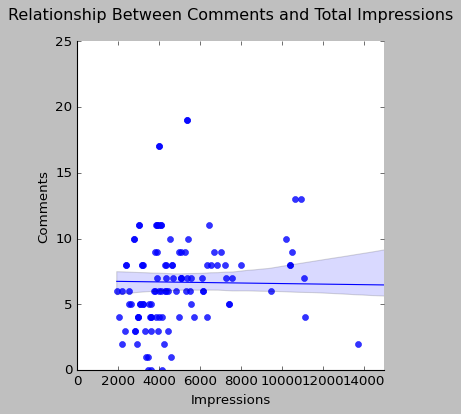

In [15]:
sns.lmplot(data=data, x="Impressions", y="Comments", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Comments and Total Impressions", pad=20)
plt.xlim(0, 15000)
plt.ylim(0, 25)
plt.show()

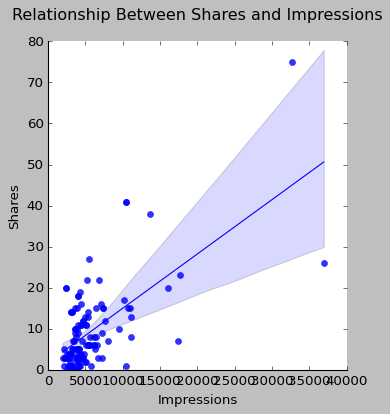

In [16]:
sns.lmplot(data=data, x="Impressions", y="Shares", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Shares and Impressions", pad=20)
plt.ylim(0, 80)
plt.xlim(0, 40000)
plt.show()

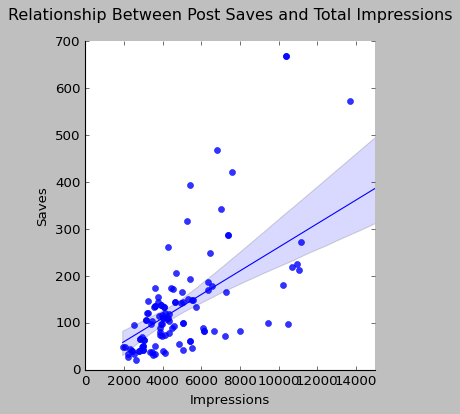

In [17]:
sns.lmplot(data=data, x="Impressions", y="Saves", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Post Saves and Total Impressions", pad=20)
plt.xlim(0, 15000)
plt.ylim(0, 700)
plt.show()

In [18]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns
data_numeric = data.drop(non_numeric_columns, axis=1)

# Now calculate the correlation
correlation = data_numeric.corr()
print(correlation["Impressions"].sort_values(ascending=False))


Non-numeric columns: Index(['Caption', 'Hashtags'], dtype='object')
Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [19]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


Text(0.5, 1.0, 'Relationship Between Profile Visits and Followers Gained')

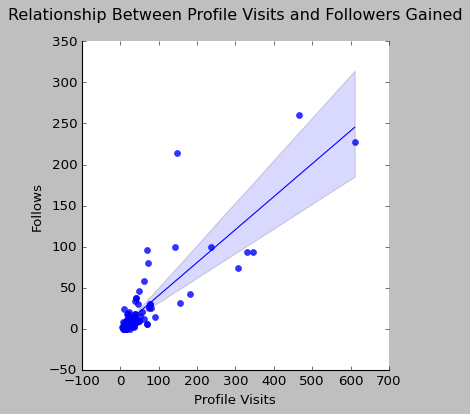

In [20]:
sns.lmplot(data=data, x="Profile Visits", y="Follows", fit_reg=True, scatter_kws={"s": 30}, line_kws={"lw":1})
ax = plt.gca()
ax.set_title("Relationship Between Profile Visits and Followers Gained", pad=20)

In [21]:
X = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = PassiveAggressiveRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# R² score
r2 = r2_score(y_test, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Baseline model
base_model = PassiveAggressiveRegressor(random_state=42, max_iter=1000)

# Perform 5-fold cross validation
cv_scores = cross_val_score(base_model, X_train, y_train, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Mean CV Score (Before Tuning):", np.mean(cv_scores))

R² Score: 0.8114326554447994
RMSE: 2706.202331851131
Cross-validation scores: [0.89004778 0.84651163 0.76255562 0.16128907 0.82091435]
Mean CV Score (Before Tuning): 0.6962636876607038


In [ ]:
# @title
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]

features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([11649.11421317])

[CV] END C=0.01, early_stopping=True, loss=epsilon_insensitive, max_iter=500, tol=0.0001, validation_fraction=0.2; total time=   0.0s
[CV] END C=0.01, early_stopping=True, loss=epsilon_insensitive, max_iter=500, tol=0.001, validation_fraction=0.2; total time=   0.0s
[CV] END C=0.01, early_stopping=True, loss=epsilon_insensitive, max_iter=500, tol=0.01, validation_fraction=0.2; total time=   0.0s
[CV] END C=0.01, early_stopping=True, loss=epsilon_insensitive, max_iter=1000, tol=0.01, validation_fraction=0.2; total time=   0.0s
[CV] END C=0.01, early_stopping=True, loss=epsilon_insensitive, max_iter=1000, tol=0.01, validation_fraction=0.2; total time=   0.0s
[CV] END C=0.01, early_stopping=True, loss=epsilon_insensitive, max_iter=2000, tol=0.001, validation_fraction=0.2; total time=   0.0s
[CV] END C=0.01, early_stopping=True, loss=epsilon_insensitive, max_iter=2000, tol=0.001, validation_fraction=0.2; total time=   0.0s
[CV] END C=0.01, early_stopping=True, loss=squared_epsilon_insensit

Number of posts with the hashtag #datascience: 94
Total impressions from posts with #datascience: 524640


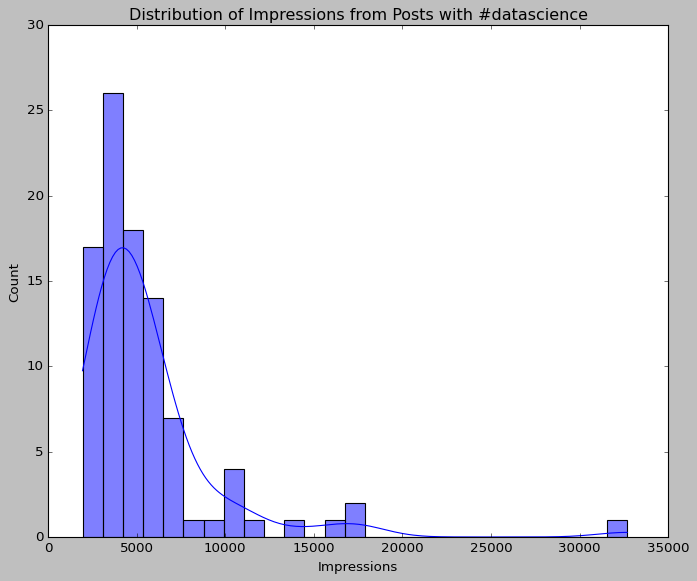

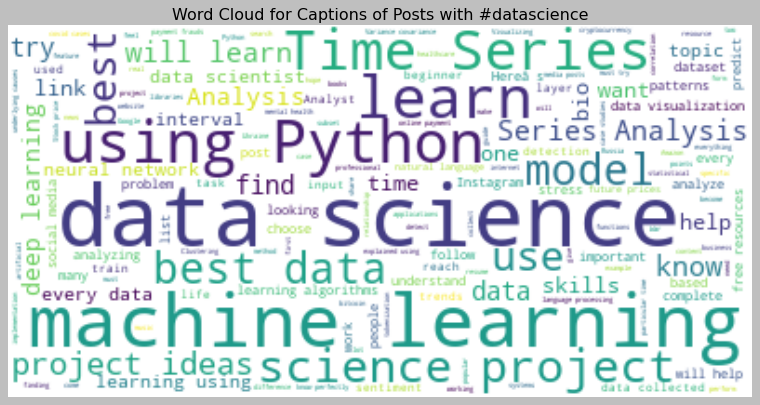

In [31]:
# Function to analyze reach based on hashtag input
def analyze_hashtag_reach(hashtag):
    # Filter the dataset by the given hashtag
    filtered_data = data[data['Hashtags'].str.contains(hashtag, na=False)]

    # Check if any data was found with the hashtag
    if filtered_data.empty:
        print(f"No posts found with the hashtag #{hashtag}")
        return

    print(f"Number of posts with the hashtag #{hashtag}: {len(filtered_data)}")

    # Analyze the impressions for posts with this hashtag
    total_impressions = filtered_data['Impressions'].sum()
    print(f"Total impressions from posts with #{hashtag}: {total_impressions}")

    # Visualize the distribution of impressions
    plt.figure(figsize=(10, 8))
    plt.title(f"Distribution of Impressions from Posts with #{hashtag}")
    sns.histplot(filtered_data['Impressions'], kde=True)
    plt.show()

    # Generate a word cloud for captions related to this hashtag
    text = " ".join(i for i in filtered_data.Caption)
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Captions of Posts with #{hashtag}")
    plt.show()

# Get user input for the hashtag
hashtag_input = input("Enter a hashtag to analyze (without #): ")
analyze_hashtag_reach(hashtag_input)


In [26]:
hashtag_likes = {}
hashtag_impressions = {}

# Iterate through each row in the dataset
for index, row in data.iterrows():
    hashtags = str(row['Hashtags']).split()
    for hashtag in hashtags:
        hashtag = hashtag.strip()
        if hashtag not in hashtag_likes:
            hashtag_likes[hashtag] = 0
            hashtag_impressions[hashtag] = 0
        hashtag_likes[hashtag] += row['Likes']
        hashtag_impressions[hashtag] += row['Impressions']

# Create a DataFrame for likes distribution
likes_distribution = pd.DataFrame(list(hashtag_likes.items()), columns=['Hashtag', 'Likes'])

# Create a DataFrame for impressions distribution
impressions_distribution = pd.DataFrame(list(hashtag_impressions.items()), columns=['Hashtag', 'Impressions'])

fig_likes = px.bar(likes_distribution, x='Hashtag', y='Likes',
                   title='Likes Distribution for Each Hashtag')

fig_impressions = px.bar(impressions_distribution, x='Hashtag',
                         y='Impressions',
                         title='Impressions Distribution for Each Hashtag')

fig_likes.show()
fig_impressions.show()

In [34]:
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Passive Aggressive Regressor
pa = PassiveAggressiveRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [500, 1000, 2000],
    'tol': [1e-4, 1e-3, 1e-2],
    'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
    'early_stopping': [True, False],
    'validation_fraction': [0.1, 0.2]
}

# GridSearch
grid_search = GridSearchCV(estimator=pa,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='r2')

grid_search.fit(X_train, y_train)

# Best model
print("Best Parameters (GridSearch):", grid_search.best_params_)
print("Best CV Score (GridSearch):", grid_search.best_score_)

best_pa = grid_search.best_estimator_

# Evaluate
y_pred = best_pa.predict(X_test)
print("\nTest R2 Score:", r2_score(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END C=0.01, early_stopping=True, loss=epsilon_insensitive, max_iter=500, tol=0.0001, validation_fraction=0.2; total time=   0.0s
[CV] END C=0.01, early_stopping=True, loss=epsilon_insensitive, max_iter=500, tol=0.001, validation_fraction=0.2; total time=   0.0s
[CV] END C=0.01, early_stopping=True, loss=epsilon_insensitive, max_iter=500, tol=0.001, validation_fraction=0.2; total time=   0.0s
[CV] END C=0.01, early_stopping=True, loss=epsilon_insensitive, max_iter=500, tol=0.001, validation_fraction=0.2; total time=   0.0s
[CV] END C=0.01, early_stopping=True, loss=epsilon_insensitive, max_iter=1000, tol=0.0001, validation_fraction=0.1; total time=   0.0s
[CV] END C=0.01, early_stopping=True, loss=epsilon_insensitive, max_iter=1000, tol=0.001, validation_fraction=0.1; total time=   0.0s
[CV] END C=0.01, early_stopping=True, loss=epsilon_insensitive, max_iter=2000, tol=0.0001, validation_fraction=0.1; total time=   0.0s